| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

## Analitika Media Sosial

### Indah Anggie Ashari
### A12.2020.06433
### A12.6501

# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

## outentifikasi dan hak akses

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("QVTt8X2YeR0IRze2LXuSbkcdv", "cAHgmrFSnKxrBM2Fw71nRerqjnn8UFfWacsWTBpFI4pBvD7Oj5")
    auth.set_access_token("1569929584673701889-NEbsD8SQ4Wf4DmQ9T1pRcSoVVj0FSt", "174GmqWcSZ4jNYXHmosc0Yj6U2TjSVPre5OcLxs1FlPTM")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username

username yang digunakan yakni @xcintakiehlx

In [4]:
tweets = extractor.user_timeline(screen_name="xcintakiehlx", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("100 tweet teratas:\n")
for tweet in tweets[:100]:
    print(tweet.text)
    print()

Tweets terambil: 199.

100 tweet teratas:

Sumpah pemuda Indonesia untuk tetap menjaga NKRI .🇮🇩 https://t.co/a4Hl5nHPwh

RT @SorenzaNuryanti: TOP 15 @TINBSOfficial  The Indonesian next big star !
Live 28.10.2022 - 9.30 pm WIB (Jakarta) @OfficialRCTI TV &amp; @RCTI…

RT @Daradatu1: @xcintakiehlx 
@jalaprt 
@KomnasPerempuan 

Kekerasan terhadap PRT kembali terjadi: RN dipukul, ditendang, ditelanjangi dan…

RT @dinopattidjalal: In last year's GlobalTownHall, mega-celeb @xcintakiehlx said young people must fight 4 their idealism. Join this year'…

Ready to shoot again!😎 https://t.co/afJPZsxdm3

Akhirnya badanku menyerah juga.🤒 https://t.co/1wd0vLDyON

RT @VoicesDayak: Selama Hari Anak Perempuan Sedunia

#dayakvoices #dayakbercerita #indonesia #kalimantan #dayak #borneo #tiwah #sungaikalim…

RT @PertaminaPF: Siapa aja, sih perempuan inisiatif penggerak ekonomi digital? Apa saja yang harus dilakukan supaya bisa menciptakan bisnis…

RT @vanesaputripink: Kdrt itu bukan kasus sepele, @xcintakie

## Masukkan ke dataframe pandas

In [6]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(100))

,Tweets
0,Sumpah pemuda Indonesia untuk tetap menjaga NK...
1,RT @SorenzaNuryanti: TOP 15 @TINBSOfficial Th...
2,RT @Daradatu1: @xcintakiehlx \n@jalaprt \n@Kom...
3,RT @dinopattidjalal: In last year's GlobalTown...
4,Ready to shoot again!😎 https://t.co/afJPZsxdm3
...,...
95,@aksara_swara @cania_citta Sepertinya sebagai ...
96,"RT @xrahmathekiehlx: Sejak kecil, Cinta Laura ..."
97,"Setelah 1 bulan shooting di Thailand, akhirnya..."
98,RT @jokowi: Melepas Kirab Merah Putih di halam...


In [105]:
dataset.to_csv('dataset_xcintakiehlx.csv')

## Menentukan Sentimen pada Tweet

In [8]:
#pip install textblob

In [9]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [11]:
auth = tweepy.OAuthHandler("QVTt8X2YeR0IRze2LXuSbkcdv", "cAHgmrFSnKxrBM2Fw71nRerqjnn8UFfWacsWTBpFI4pBvD7Oj5")
auth.set_access_token("1569929584673701889-NEbsD8SQ4Wf4DmQ9T1pRcSoVVj0FSt", "174GmqWcSZ4jNYXHmosc0Yj6U2TjSVPre5OcLxs1FlPTM")
api = tweepy.API(auth)

hasilsearch = api.search_tweets(q="xcintakiehlx",lang="id",count=100)

In [12]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet.created_at
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["isi_tweet"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)
        

RT Hi Sahabat Perempuan dan Anak Kalau kamu mengalami kekerasan segera laporkan ke Layanan SAPA 129 atau Whatsapp ke 08111
'list' object has no attribute 'strip'
Lestari Cueki
'list' object has no attribute 'strip'
RT Wah gak terima saya KEBAYA disebut pakaian asalnya dari India dan disebut pakaian BUDAK Lestari
'list' object has no attribute 'strip'
RT Wah gak terima saya KEBAYA disebut pakaian asalnya dari India dan disebut pakaian BUDAK Lestari
'list' object has no attribute 'strip'
RT Lestari Dia bilang dal
'list' object has no attribute 'strip'
RT Wah gak terima saya KEBAYA disebut pakaian asalnya dari India dan disebut pakaian BUDAK Lestari
'list' object has no attribute 'strip'
Lestari Nar
'list' object has no attribute 'strip'
RT Ternyata Jurusan Psikologi toh Wow Cumlaude asli 3 9 Proud of you Queen Kasmaran
'list' object has no attribute 'strip'
Sesuai instruksi pk tth filsuf Godaan yg paling berat itu sex sesuai analisa apalagi jik
'list' object has no attribute 'strip'
Sala

'list' object has no attribute 'strip'
Napa dlm islam ada makanan diharankam Dlm pendidikan sex agar disaat wanita memberikan mandi kucing k
'list' object has no attribute 'strip'
Alhamdulillah sudah sehat kembali Semangat
'list' object has no attribute 'strip'
Lelaki itu harus maskulin sedikit feminim Anak 2 pencinta alam sejati seperti itu Selalu menjaga badam agar sehat
'list' object has no attribute 'strip'
Pola makan bagus akan ciptakan badan jadi harum mis berolahraga keluarkan keringat mati agar tdk bau Beli pakaian
'list' object has no attribute 'strip'
RT Akhirnya badanku menyerah juga
'list' object has no attribute 'strip'
kemarin aku ada baca berita kak cinta sakit beneran Udah gimana kabarnya kak
'list' object has no attribute 'strip'
Dijaman sekarang tdk menampik byk wanita cabtik lebih agresif dibanding lelaki cupu model aku ini Mungkin merasa n
'list' object has no attribute 'strip'
Lelaki model aku saat lihat wanita menyentuh aku hasrat sex sangat tinggi Tapi disaat wan

In [13]:
df = pd.DataFrame(hasilanalisis) #convert ke data pandas dataframe
df

,tanggal_tweet,pengguna,isi_tweet,sentimen
0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0
1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0
2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0
...,...,...,...,...
95,2022-10-26 06:06:10+00:00,Deariy,@a_doni95 @xcintakiehlx Hahaha.. Berat.. Biar ...,1
96,2022-10-26 06:05:36+00:00,Deariy,RT @a_doni95: @Deariy @xcintakiehlx Kucing Ken...,0
97,2022-10-26 06:05:09+00:00,a_doni95,@Deariy @xcintakiehlx Kucing Kenapa bukan pria...,0
98,2022-10-26 04:05:52+00:00,Gunawan2751,@xcintakiehlx Sugeng Enjing https://t.co/gtiwE...,0


In [15]:
df.to_csv('Dataset_Sentimen.csv') #simpan pandas dataframe ke csv file

# Preprocessing Tahap 00
## Yang dipakai adalah Label Sentimen

In [16]:
df.head()

,tanggal_tweet,pengguna,isi_tweet,sentimen
0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0
1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0
2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0


## cek info

In [17]:
df.head(100)

,tanggal_tweet,pengguna,isi_tweet,sentimen
0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0
1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0
2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0
...,...,...,...,...
95,2022-10-26 06:06:10+00:00,Deariy,@a_doni95 @xcintakiehlx Hahaha.. Berat.. Biar ...,1
96,2022-10-26 06:05:36+00:00,Deariy,RT @a_doni95: @Deariy @xcintakiehlx Kucing Ken...,0
97,2022-10-26 06:05:09+00:00,a_doni95,@Deariy @xcintakiehlx Kucing Kenapa bukan pria...,0
98,2022-10-26 04:05:52+00:00,Gunawan2751,@xcintakiehlx Sugeng Enjing https://t.co/gtiwE...,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tanggal_tweet  100 non-null    datetime64[ns, UTC]
 1   pengguna       100 non-null    object             
 2   isi_tweet      100 non-null    object             
 3   sentimen       100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 3.2+ KB


## Load Dataset

In [19]:
df = pd.read_csv('Dataset_Sentimen.csv')

df.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0
5,5,2022-10-30 15:03:35+00:00,wongkalibanteng,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
6,6,2022-10-30 15:03:21+00:00,YusufNusantara5,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0
7,7,2022-10-30 14:50:29+00:00,davidmimchaewl,RT @Deariy: Ternyata @xcintakiehlx Jurusan Psi...,1
8,8,2022-10-30 14:11:24+00:00,Hendrikorachman,Sesuai instruksi pk @maman1965 tth filsuf. God...,0
9,9,2022-10-30 14:00:41+00:00,Hendrikorachman,Salah satu mahkluk yg masih hidup diluar kenab...,0


In [20]:
df

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0
...,...,...,...,...,...
95,95,2022-10-26 06:06:10+00:00,Deariy,@a_doni95 @xcintakiehlx Hahaha.. Berat.. Biar ...,1
96,96,2022-10-26 06:05:36+00:00,Deariy,RT @a_doni95: @Deariy @xcintakiehlx Kucing Ken...,0
97,97,2022-10-26 06:05:09+00:00,a_doni95,@Deariy @xcintakiehlx Kucing Kenapa bukan pria...,0
98,98,2022-10-26 04:05:52+00:00,Gunawan2751,@xcintakiehlx Sugeng Enjing https://t.co/gtiwE...,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     100 non-null    int64 
 1   tanggal_tweet  100 non-null    object
 2   pengguna       100 non-null    object
 3   isi_tweet      100 non-null    object
 4   sentimen       100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [26]:
#!pip install ekphrasis

In [23]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


C:\Users\ASUS\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\ASUS\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [24]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

In [25]:
import string

## Melakukan pembersihan dengan memanggil fungsi diatas

In [27]:
final_string = []
for text in df['isi_tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [28]:
df["step01"] = final_string

In [29]:
df

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...
...,...,...,...,...,...,...
95,95,2022-10-26 06:06:10+00:00,Deariy,@a_doni95 @xcintakiehlx Hahaha.. Berat.. Biar ...,1,user user hahaha berat biar saya saja
96,96,2022-10-26 06:05:36+00:00,Deariy,RT @a_doni95: @Deariy @xcintakiehlx Kucing Ken...,0,rt user user user kucing kenapa bukan pria sep...
97,97,2022-10-26 06:05:09+00:00,a_doni95,@Deariy @xcintakiehlx Kucing Kenapa bukan pria...,0,user user kucing kenapa bukan pria sepertinya ...
98,98,2022-10-26 04:05:52+00:00,Gunawan2751,@xcintakiehlx Sugeng Enjing https://t.co/gtiwE...,0,user sugeng enjing cogtiweudyzl


#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [30]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(100)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...
...,...,...,...,...,...,...
95,95,2022-10-26 06:06:10+00:00,Deariy,@a_doni95 @xcintakiehlx Hahaha.. Berat.. Biar ...,1,user user hahaha berat biar saya saja
96,96,2022-10-26 06:05:36+00:00,Deariy,RT @a_doni95: @Deariy @xcintakiehlx Kucing Ken...,0,rt user user user kucing kenapa bukan pria sep...
97,97,2022-10-26 06:05:09+00:00,a_doni95,@Deariy @xcintakiehlx Kucing Kenapa bukan pria...,0,user user kucing kenapa bukan pria sepertinya ...
98,98,2022-10-26 04:05:52+00:00,Gunawan2751,@xcintakiehlx Sugeng Enjing https://t.co/gtiwE...,0,user sugeng enjing cogtiweudyzl


## Hapus data kosong

In [31]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [32]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     0 non-null      int64 
 1   tanggal_tweet  0 non-null      object
 2   pengguna       0 non-null      object
 3   isi_tweet      0 non-null      object
 4   sentimen       0 non-null      int64 
 5   step01         0 non-null      object
dtypes: int64(2), object(4)
memory usage: 0.0+ bytes


In [33]:
df_hapus.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01


In [34]:
df_new = df[~df.isin(df_hapus)].dropna()

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     100 non-null    int64 
 1   tanggal_tweet  100 non-null    object
 2   pengguna       100 non-null    object
 3   isi_tweet      100 non-null    object
 4   sentimen       100 non-null    int64 
 5   step01         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [36]:
df_new

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...
...,...,...,...,...,...,...
95,95,2022-10-26 06:06:10+00:00,Deariy,@a_doni95 @xcintakiehlx Hahaha.. Berat.. Biar ...,1,user user hahaha berat biar saya saja
96,96,2022-10-26 06:05:36+00:00,Deariy,RT @a_doni95: @Deariy @xcintakiehlx Kucing Ken...,0,rt user user user kucing kenapa bukan pria sep...
97,97,2022-10-26 06:05:09+00:00,a_doni95,@Deariy @xcintakiehlx Kucing Kenapa bukan pria...,0,user user kucing kenapa bukan pria sepertinya ...
98,98,2022-10-26 04:05:52+00:00,Gunawan2751,@xcintakiehlx Sugeng Enjing https://t.co/gtiwE...,0,user sugeng enjing cogtiweudyzl


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [37]:
## Bisa menggunakan nltk 
import nltk
from nltk.tokenize import word_tokenize 

In [38]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [39]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [40]:
df_new.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...,"[rt, user, hi, sahabat, perempuan, dan, anak, ..."
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...,"[user, user, user, user, user, user, user, use..."
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis..."
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis..."
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...,"[rt, user, user, user, user, user, user, user,..."
5,5,2022-10-30 15:03:35+00:00,wongkalibanteng,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis..."
6,6,2022-10-30 15:03:21+00:00,YusufNusantara5,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user nar co...,"[user, user, user, user, user, user, user, use..."
7,7,2022-10-30 14:50:29+00:00,davidmimchaewl,RT @Deariy: Ternyata @xcintakiehlx Jurusan Psi...,1,rt user ternyata user jurusan psikologi toh wo...,"[rt, user, ternyata, user, jurusan, psikologi,..."
8,8,2022-10-30 14:11:24+00:00,Hendrikorachman,Sesuai instruksi pk @maman1965 tth filsuf. God...,0,sesuai instruksi pk user tth filsuf godaan yg ...,"[sesuai, instruksi, pk, user, tth, filsuf, god..."
9,9,2022-10-30 14:00:41+00:00,Hendrikorachman,Salah satu mahkluk yg masih hidup diluar kenab...,0,salah satu mahkluk yg masih hidup diluar kenab...,"[salah, satu, mahkluk, yg, masih, hidup, dilua..."


In [41]:
normalized_word = pd.read_csv('kamus_clean.csv', sep=",")

In [42]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [43]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [44]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [45]:
df_new["step02"] = final_string_tokens

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [46]:
df_new.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...,"[rt, user, hi, sahabat, perempuan, dan, anak, ...","[rt, user, hi, sahabat, perempuan, dan, anak, ...",rt user hi sahabat perempuan dan anak kalau ka...
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...,"[user, user, user, user, user, user, user, use...","[user, user, user, user, user, user, user, use...",user user user user user user user user cueki ...
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...,"[rt, user, user, user, user, user, user, user,...","[rt, user, user, user, user, user, user, user,...",rt user user user user user user user user use...
5,5,2022-10-30 15:03:35+00:00,wongkalibanteng,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...
6,6,2022-10-30 15:03:21+00:00,YusufNusantara5,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user nar co...,"[user, user, user, user, user, user, user, use...","[user, user, user, user, user, user, user, use...",user user user user user user user user nar co...
7,7,2022-10-30 14:50:29+00:00,davidmimchaewl,RT @Deariy: Ternyata @xcintakiehlx Jurusan Psi...,1,rt user ternyata user jurusan psikologi toh wo...,"[rt, user, ternyata, user, jurusan, psikologi,...","[rt, user, ternyata, user, jurusan, psikologi,...",rt user ternyata user jurusan psikologi toh wo...
8,8,2022-10-30 14:11:24+00:00,Hendrikorachman,Sesuai instruksi pk @maman1965 tth filsuf. God...,0,sesuai instruksi pk user tth filsuf godaan yg ...,"[sesuai, instruksi, pk, user, tth, filsuf, god...","[sesuai, instruksi, pk, user, tth, filsuf, god...",sesuai instruksi pk user tth filsuf godaan yg ...
9,9,2022-10-30 14:00:41+00:00,Hendrikorachman,Salah satu mahkluk yg masih hidup diluar kenab...,0,salah satu mahkluk yg masih hidup diluar kenab...,"[salah, satu, mahkluk, yg, masih, hidup, dilua...","[salah, satu, mahkluk, yg, masih, hidup, dilua...",salah satu mahkluk yg masih hidup diluar kenab...


## simpan file terlebih dahulu
gunakan fitur ini, kenapa? untuk mengecek apakah preprocessing kita sudah sesuai logika atau tidak
- Contoh : pastikan kata `beserta` tetap menjadi `beserta`, bukan `bese a`

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [47]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load dataset

In [48]:
import pandas as pd

In [49]:
dataset = pd.read_csv('clean_dataset_uts_part01.csv', sep=';')

In [50]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02
0,0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...,"['rt', 'user', 'hi', 'sahabat', 'perempuan', '...","['rt', 'user', 'hi', 'sahabat', 'perempuan', '...",rt user hi sahabat perempuan dan anak kalau ka...
1,1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...,"['user', 'user', 'user', 'user', 'user', 'user...","['user', 'user', 'user', 'user', 'user', 'user...",user user user user user user user user cueki ...
2,2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"['rt', 'user', 'wah', 'gak', 'terima', 'saya',...","['rt', 'user', 'wah', 'gak', 'terima', 'saya',...",rt user wah gak terima saya kebaya disebut pak...
3,3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"['rt', 'user', 'wah', 'gak', 'terima', 'saya',...","['rt', 'user', 'wah', 'gak', 'terima', 'saya',...",rt user wah gak terima saya kebaya disebut pak...
4,4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...,"['rt', 'user', 'user', 'user', 'user', 'user',...","['rt', 'user', 'user', 'user', 'user', 'user',...",rt user user user user user user user user use...


## Load sastrawi sebagai stemmer

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

##  stopwords

In [52]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
### Tuliskan perintahnya disini ???

stopwords_sastrawi = factory.create_stop_word_remover()

In [53]:
df_new['step02'] = df_new['step02'].apply(str)

In [54]:
df_new.head()

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...,"[rt, user, hi, sahabat, perempuan, dan, anak, ...","[rt, user, hi, sahabat, perempuan, dan, anak, ...",rt user hi sahabat perempuan dan anak kalau ka...
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...,"[user, user, user, user, user, user, user, use...","[user, user, user, user, user, user, user, use...",user user user user user user user user cueki ...
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...,"[rt, user, user, user, user, user, user, user,...","[rt, user, user, user, user, user, user, user,...",rt user user user user user user user user use...


In [55]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [56]:
df_new.loc[:, ('ProcessedText')] = final_string

In [57]:
df_new.head()

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...,"[rt, user, hi, sahabat, perempuan, dan, anak, ...","[rt, user, hi, sahabat, perempuan, dan, anak, ...",rt user hi sahabat perempuan dan anak kalau ka...,rt user hi sahabat perempuan anak kalau kamu a...
1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...,"[user, user, user, user, user, user, user, use...","[user, user, user, user, user, user, user, use...",user user user user user user user user cueki ...,user user user user user user user user cuek c...
2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...,rt user wah gak terima kebaya sebut pakai asal...
3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"[rt, user, wah, gak, terima, saya, kebaya, dis...","[rt, user, wah, gak, terima, saya, kebaya, dis...",rt user wah gak terima saya kebaya disebut pak...,rt user wah gak terima kebaya sebut pakai asal...
4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...,"[rt, user, user, user, user, user, user, user,...","[rt, user, user, user, user, user, user, user,...",rt user user user user user user user user use...,rt user user user user user user user user use...


## simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [58]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

### load dataset

In [59]:
import pandas as pd
import numpy as np

In [60]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [61]:
dataset.shape

(100, 11)

In [62]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,0,0,2022-10-30 17:01:29+00:00,shinebieber99,RT @xcintakiehlx: Hi Sahabat Perempuan dan Ana...,0,rt user hi sahabat perempuan dan anak kalau ka...,"['rt', 'user', 'hi', 'sahabat', 'perempuan', '...","['rt', 'user', 'hi', 'sahabat', 'perempuan', '...",rt user hi sahabat perempuan dan anak kalau ka...,rt user hi sahabat perempuan anak kalau kamu a...
1,1,1,2022-10-30 16:59:28+00:00,Thomastjik,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user cueki ...,"['user', 'user', 'user', 'user', 'user', 'user...","['user', 'user', 'user', 'user', 'user', 'user...",user user user user user user user user cueki ...,user user user user user user user user cuek c...
2,2,2,2022-10-30 16:49:24+00:00,Kembara082022,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"['rt', 'user', 'wah', 'gak', 'terima', 'saya',...","['rt', 'user', 'wah', 'gak', 'terima', 'saya',...",rt user wah gak terima saya kebaya disebut pak...,rt user wah gak terima kebaya sebut pakai asal...
3,3,3,2022-10-30 16:39:05+00:00,TMaroe,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"['rt', 'user', 'wah', 'gak', 'terima', 'saya',...","['rt', 'user', 'wah', 'gak', 'terima', 'saya',...",rt user wah gak terima saya kebaya disebut pak...,rt user wah gak terima kebaya sebut pakai asal...
4,4,4,2022-10-30 16:17:02+00:00,sezer1405,RT @redpicasa: @sezer1405 @Madebylaluna @Leoni...,0,rt user user user user user user user user use...,"['rt', 'user', 'user', 'user', 'user', 'user',...","['rt', 'user', 'user', 'user', 'user', 'user',...",rt user user user user user user user user use...,rt user user user user user user user user use...
5,5,5,2022-10-30 15:03:35+00:00,wongkalibanteng,RT @sezer1405: Wah gak terima saya KEBAYA dise...,0,rt user wah gak terima saya kebaya disebut pak...,"['rt', 'user', 'wah', 'gak', 'terima', 'saya',...","['rt', 'user', 'wah', 'gak', 'terima', 'saya',...",rt user wah gak terima saya kebaya disebut pak...,rt user wah gak terima kebaya sebut pakai asal...
6,6,6,2022-10-30 15:03:21+00:00,YusufNusantara5,@sezer1405 @Madebylaluna @Leonita_Lestari @Cin...,0,user user user user user user user user nar co...,"['user', 'user', 'user', 'user', 'user', 'user...","['user', 'user', 'user', 'user', 'user', 'user...",user user user user user user user user nar co...,user user user user user user user user nar co...
7,7,7,2022-10-30 14:50:29+00:00,davidmimchaewl,RT @Deariy: Ternyata @xcintakiehlx Jurusan Psi...,1,rt user ternyata user jurusan psikologi toh wo...,"['rt', 'user', 'ternyata', 'user', 'jurusan', ...","['rt', 'user', 'ternyata', 'user', 'jurusan', ...",rt user ternyata user jurusan psikologi toh wo...,rt user nyata user jurus psikologi wow cumlaud...
8,8,8,2022-10-30 14:11:24+00:00,Hendrikorachman,Sesuai instruksi pk @maman1965 tth filsuf. God...,0,sesuai instruksi pk user tth filsuf godaan yg ...,"['sesuai', 'instruksi', 'pk', 'user', 'tth', '...","['sesuai', 'instruksi', 'pk', 'user', 'tth', '...",sesuai instruksi pk user tth filsuf godaan yg ...,sesuai instruksi pk user tth filsuf goda yg pa...
9,9,9,2022-10-30 14:00:41+00:00,Hendrikorachman,Salah satu mahkluk yg masih hidup diluar kenab...,0,salah satu mahkluk yg masih hidup diluar kenab...,"['salah', 'satu', 'mahkluk', 'yg', 'masih', 'h...","['salah', 'satu', 'mahkluk', 'yg', 'masih', 'h...",salah satu mahkluk yg masih hidup diluar kenab...,salah satu mahkluk yg hidup luar nabi dajal aj...


In [63]:
dataset_feature = df_new['ProcessedText'].astype(str)

In [64]:
dataset_label = df_new['sentimen']

In [65]:
dataset_feature

0     rt user hi sahabat perempuan anak kalau kamu a...
1     user user user user user user user user cuek c...
2     rt user wah gak terima kebaya sebut pakai asal...
3     rt user wah gak terima kebaya sebut pakai asal...
4     rt user user user user user user user user use...
                            ...                        
95                     user user hahaha berat biar saja
96    rt user user user kucing bukan pria seperti ba...
97    user user kucing bukan pria seperti banyak pri...
98                      user sugeng enjing cogtiweudyzl
99                                     user user fotoin
Name: ProcessedText, Length: 100, dtype: object

In [66]:
dataset_label

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    0
99    0
Name: sentimen, Length: 100, dtype: int64

### Cek Distribusi Data

In [67]:
dataset_label.value_counts()

0    88
1    12
Name: sentimen, dtype: int64

In [68]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    88.0%
1    12.0%
Name: sentimen, dtype: object

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
sources = []
for source in dataset['sentimen']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* 0
* 1


<Figure size 864x576 with 0 Axes>

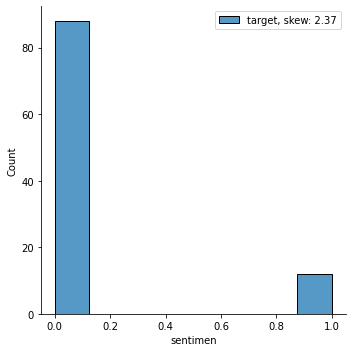

In [71]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

**kesimpulan dri diagram**

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Sentimen

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer = TfidfVectorizer()

In [74]:
X = vectorizer.fit_transform(dataset_feature)

In [75]:
print(X.shape)

(100, 345)


In [76]:
features = vectorizer.get_feature_names_out()
features

array(['acafa', 'agama', 'agresif', 'ah', 'aj', 'aja', 'ajaib', 'akhir',
       'akmur', 'aku', 'alam', 'alami', 'alhamdulillah', 'anak',
       'analisa', 'apapu', 'artis', 'asa', 'asal', 'asli', 'baca',
       'badam', 'badan', 'bagi', 'bagus', 'banding', 'bangsa', 'bantu',
       'banyak', 'bau', 'be', 'bebh', 'beda', 'belah', 'beli', 'beneran',
       'berat', 'beri', 'berita', 'biar', 'big', 'bila', 'bilang', 'bin',
       'bintang', 'bohir', 'bosan', 'brdaulat', 'breakfast', 'buah',
       'budak', 'buka', 'bukan', 'byk', 'cabtik', 'cantik', 'cerai',
       'cinta', 'cipta', 'cium', 'co1wd0vldyon', 'co7c8vkjq8ji',
       'coa4hl5nhpwh', 'coase78if4bt', 'cob3gngbiug9', 'cobjkqjxlsir',
       'coenz7bsk74x', 'coeuxfse52b4', 'coezfmrltpwp', 'cof4j5npcmqg',
       'cofhz3kipcan', 'coflt3ackwh2', 'cofz1l9l3lty', 'cogcb8gsdqoj',
       'cogor2ryienf', 'cogtiweudyzl', 'coicz769jvg4', 'coitejkij695',
       'cokbqgc322ht', 'colwfdhoaqbb', 'comvtazxxfql', 'copb1go1up7c',
       'copsnz0zo

In [77]:
idfValues = vectorizer.idf_

In [78]:
d = dict(zip(features, 9 - idfValues))

In [79]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [80]:
for i in range(200):
    print(sortedDict[i])

('user', 7.884689153489005)
('rt', 7.256080494066632)
('pemuda', 6.6807163491630694)
('sumpah', 6.6807163491630694)
('jaga', 6.642976021180223)
('indonesia', 6.603755308026941)
('coa4hl5nhpwh', 6.5629333135066865)
('nkri', 6.5629333135066865)
('tetap', 6.5629333135066865)
('number', 6.023936812773999)
('pakai', 5.782774755957111)
('budak', 5.687464576152786)
('asal', 5.582104060494959)
('gak', 5.582104060494959)
('india', 5.582104060494959)
('kebaya', 5.582104060494959)
('sebut', 5.582104060494959)
('terima', 5.582104060494959)
('wah', 5.582104060494959)
('big', 5.330789632214054)
('cinta', 5.330789632214054)
('date', 5.330789632214054)
('indonesian', 5.330789632214054)
('jakarta', 5.330789632214054)
('live', 5.330789632214054)
('next', 5.330789632214054)
('pm', 5.330789632214054)
('star', 5.330789632214054)
('the', 5.330789632214054)
('top', 5.330789632214054)
('tv', 5.330789632214054)
('wib', 5.330789632214054)
('yg', 5.330789632214054)
('aku', 5.176638952386796)
('lelaki', 5.1766389

In [81]:
positive_low_reviews = dataset[(dataset["sentimen"] == 1)]
negative_low_reviews = dataset[(dataset["sentimen"] == -1)]
neutral_reviews = dataset[(dataset["sentimen"] == 0)]
positive_high_reviews = dataset[(dataset["sentimen"] == 2)]
negative_high_reviews = dataset[(dataset["sentimen"] == -2)]

In [82]:
#!pip install wordcloud

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [84]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

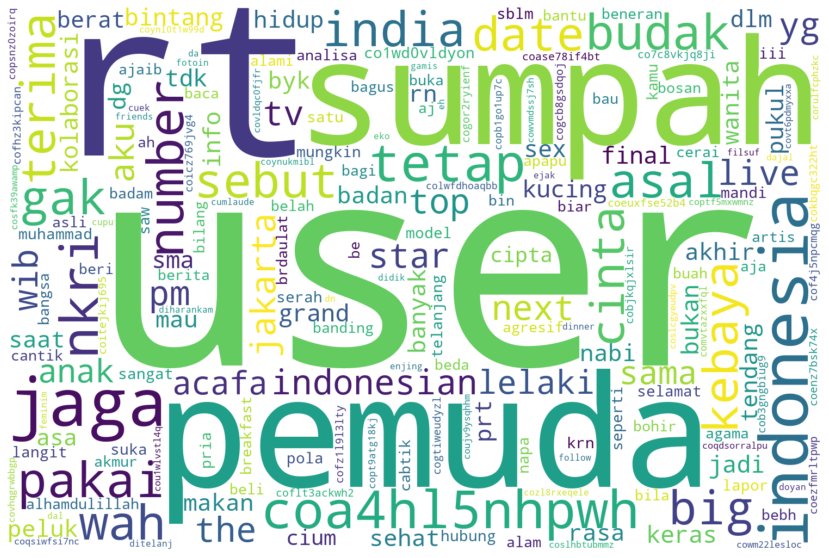

In [85]:
PlotWordCloud(d)

## Cek sentimen untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [86]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [87]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [88]:
Data_TFIDF.shape

(100, 791)

## Training dan Testing dibagi menjadi 70 - 30
dengan 70 untuk data training dan 30 untuk data testing

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [90]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [91]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model - Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [93]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [94]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [95]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

### nilai accuracy Training set dan Test set

In [96]:
## Berapa nilai Accuracy Training set dan Test Set 
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  1.0


### nilai Recall Training set dan Test set 

In [97]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  1.0


### nilai Precision Training set dan Test set

In [98]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  1.0


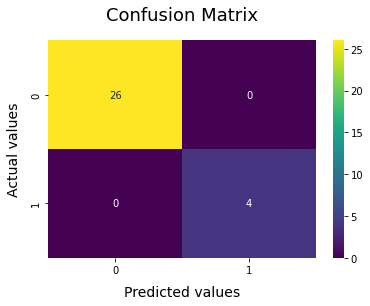

In [99]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [100]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [101]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,1.0


In [102]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [103]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,1.0,1.0,1.0


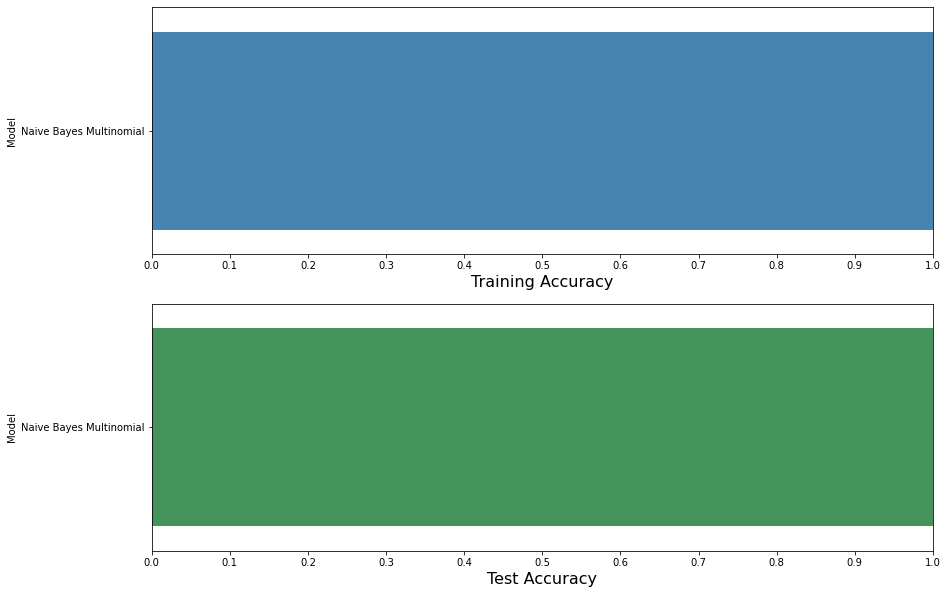

In [104]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan:



- Dari dataset yang diatas dapat diambil kesimpulan bahwa dalam melakukan proses stemming dan stopworld nilai training dan testing ternyata memiliki akurasi nilai yang sama tingginya yaitu untuk nilai akurasi dari training sebanyak 1.0, sedangkan untuk nilai akurasi dari testing pun sebanyak 1.0 